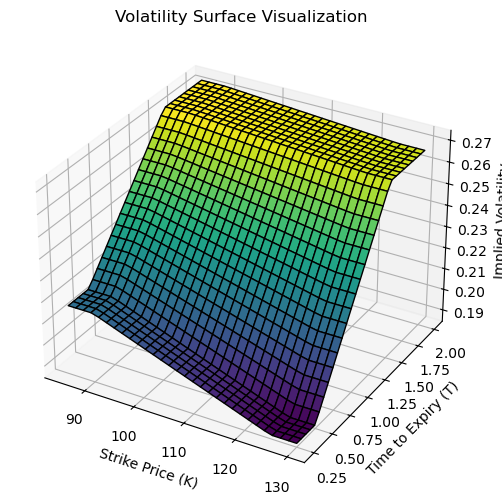

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from options_market_maker.pricing.volatility_surface import fit_volatility_surface


# Sample market data for a single underlying
strikes = np.array([90, 100, 110, 95, 105, 115, 120, 125])
expiries = np.array([0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.5, 1.5])
market_ivs = np.array([0.22, 0.20, 0.21, 0.25, 0.22, 0.23, 0.28, 0.26])

# Fit the volatility surface
vol_surface = fit_volatility_surface(strikes, expiries, market_ivs)

# Generate a grid of strikes and expiries
strike_grid, expiry_grid = np.meshgrid(np.linspace(85, 130, 30), np.linspace(0.25, 2, 30))
iv_surface = np.array([vol_surface(K, T) for K, T in zip(strike_grid.flatten(), expiry_grid.flatten())])
iv_surface = iv_surface.reshape(strike_grid.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(strike_grid, expiry_grid, iv_surface, cmap='viridis', edgecolor='k')

# Labels
ax.set_xlabel("Strike Price (K)")
ax.set_ylabel("Time to Expiry (T)")
ax.set_zlabel("Implied Volatility")
ax.set_title("Volatility Surface Visualization")

plt.show()

